In [24]:
# # import sys
# # !{sys.executable} -m pip install tiktoken
# import tiktoken

In [26]:
import tiktoken

In [39]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

tokenizer = tiktoken.get_encoding("gpt2")
enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5145


In [45]:
enc_sample = enc_text[:50]

In [49]:
print(enc_sample)

[40, 367, 2885, 1464, 1807, 3619, 402, 271, 10899, 2138, 257, 7026, 15632, 438, 2016, 257, 922, 5891, 1576, 438, 568, 340, 373, 645, 1049, 5975, 284, 502, 284, 3285, 326, 11, 287, 262, 6001, 286, 465, 13476, 11, 339, 550, 5710, 465, 12036, 11, 6405, 257, 5527, 27075, 11]


In [67]:
context_size = 4

x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]

print(f"x: {x}")
print(f"y:     {y}")

x: [40, 367, 2885, 1464]
y:     [367, 2885, 1464, 1807]


In [69]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(context, "------>", desired)

[40] ------> 367
[40, 367] ------> 2885
[40, 367, 2885] ------> 1464
[40, 367, 2885, 1464] ------> 1807


In [75]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(tokenizer.decode(context), "------>", tokenizer.decode([desired]))

I ------>  H
I H ------> AD
I HAD ------>  always
I HAD always ------>  thought


<h1>Implement a Data Loader</h1>

In [78]:
# pip install torch torchvision torchaudio

  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2026.1.0-py3-none-any.whl.metadata (10 kB)
  Using cached markupsafe-3.0.3-cp310-cp310-macosx_11_0_arm64.whl.metadata (2.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 MB 28.6 MB/s  0:00:02m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 734.9/734.9 kB 21.4 MB/s  0:00:00
Using cached fsspec-2026.1.0-py3-none-any.whl (201 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached markupsafe-3.0.3-cp310-cp310-macosx_11_0_arm64.whl (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [torchaudio]6 [torchvision]
Note: you may need to restart the kernel to use updated packages.


In [82]:
from torch.utils.data import Dataset, DataLoader
# max_length = context size
# tokenizer = bpe
# txt = dataset
# stride = jump (slide)

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        token_ids = tokenizer.encode(txt, allowed_special = {"<|endoftext|>"})

        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i+1: i+max_length+1]
            self.input_ids.append(torch. (input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self,idx):
        return self.input_ids[idx], self.target_ids[idx]

In [84]:
def create_dataloader_v1(txt, batch_size = 4, max_length = 256, stride = 128, shuffle = True, drop_last = True, num_workers = 0):
    tokenizer = tiktoken.get_encoding("gpt2")

    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    dataloader = DataLoader(
        dataset,
        batch_size = batch_size,
        shuffle = shuffle,
        drop_last = drop_last,
        num_workers = num_workers
    )

    return dataloader

In [86]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

In [88]:
import torch
print("Pytorch version : ", torch.__version__)
dataloader = create_dataloader_v1(
    raw_text, batch_size = 1, max_length = 4, stride = 1, shuffle = False
)
data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

Pytorch version :  2.10.0
[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [90]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


In [92]:
dataloader = create_dataloader_v1(
    raw_text, batch_size = 8, max_length = 4, stride = 4, shuffle = False
)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs : \n", inputs)
print("\nTargets : \n", targets)

Inputs : 
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets : 
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


<h1>Positional Encodings</h1>

In [95]:
vocab_size = 50257
output_dim = 256

token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [97]:
max_length = 4
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=max_length,
    stride=max_length, shuffle=False
)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)

In [99]:
print("Token IDs:\n", inputs)
print("\nInput shape:\n", inputs.shape) 

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Input shape:
 torch.Size([8, 4])


In [126]:
# A lookup operation to get token embeddings for the inputs 
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [128]:
# Positional Encoding creation operation (Random)
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)

In [130]:
# Positional Encoding lookup operation
pos_embeddings = pos_embedding_layer(torch.arange(max_length)) #Getting 4 positional encoding vectors as context size is of 4
print(pos_embeddings.shape)

torch.Size([4, 256])


In [132]:
input_embeddings = token_embeddings + pos_embeddings #Broadcasting operation
print(input_embeddings.shape)

torch.Size([8, 4, 256])


<h1> Self attention (without trainable weights)</h1>

In [139]:
import torch

inputs = torch.tensor(
    [
        [0.43, 0.15, 0.89],
        [0.55, 0.87, 0.66],
        [0.57, 0.85, 0.64],
        [0.22, 0.58, 0.33],
        [0.77, 0.25, 0.10],
        [0.05, 0.80, 0.55]
    ]
)

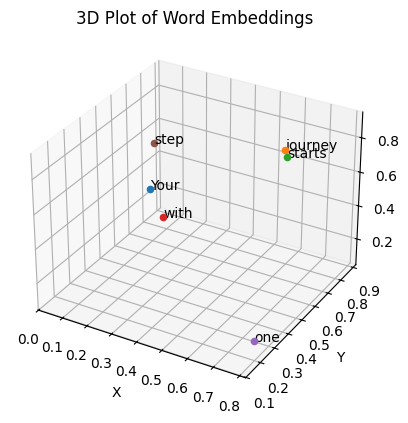

In [147]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

words = ['Your', 'journey', 'starts', 'with', 'one', 'step']

x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize = 10)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

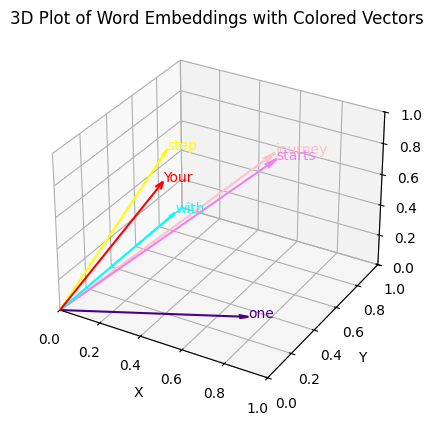

In [167]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

colors = ['red', 'pink', 'violet', 'aqua', 'indigo', 'yellow']


for(x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    ax.quiver(0,0,0,x,y,z, color = color, arrow_length_ratio = 0.05)
    ax.text(x,y,z, word, fontsize = 10, color = color)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_zlim([0,1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

In [181]:
query = inputs[1]

attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)

print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [185]:
# Not using Softmax here but generally we should
# We are using summation based normalization
attn_weights_2_tmp = attn_scores_2/attn_scores_2.sum()

print("Attention weights : ",attn_weights_2_tmp)
print("Sum : ", attn_weights_2_tmp.sum())

Attention weights :  tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum :  tensor(1.0000)


In [187]:
def softmax_naive(x):
    return torch.exp(x)/ torch.exp(x).sum(dim=0)

attn_weights_2_naive = softmax_naive(attn_scores_2)
print("Attention weights : ",attn_weights_2_naive)
print("Sum : ", attn_weights_2_naive.sum())

Attention weights :  tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum :  tensor(1.)


In [189]:
attn_weights_2 = torch.softmax(attn_scores_2, dim = 0)
print("Attention weights : ",attn_weights_2)
print("Sum : ", attn_weights_2.sum())

Attention weights :  tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum :  tensor(1.)


In [191]:
query = inputs[1]

context_vec_2 = torch.zeros(query.shape)
for i, x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i] * x_i

print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


In [193]:
inputs = torch.tensor(
    [
        [0.43, 0.15, 0.89],
        [0.55, 0.87, 0.66],
        [0.57, 0.85, 0.64],
        [0.22, 0.58, 0.33],
        [0.77, 0.25, 0.10],
        [0.05, 0.80, 0.55],
        [0.4419, 0.6515, 0.5683]
    ]
)

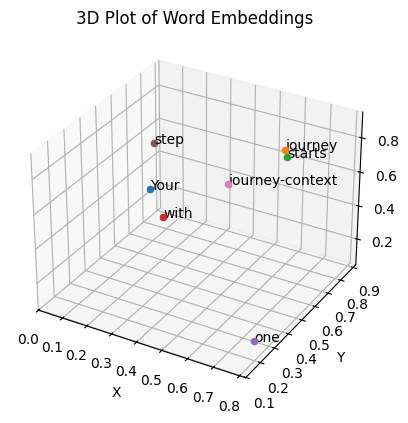

In [199]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

words = ['Your', 'journey', 'starts', 'with', 'one', 'step', 'journey-context']

x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize = 10)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

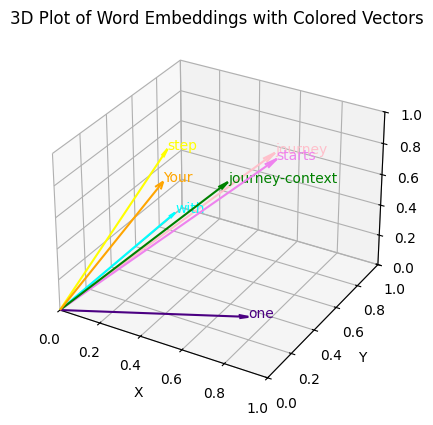

In [205]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

colors = ['orange', 'pink', 'violet', 'aqua', 'indigo', 'yellow', 'green']


for(x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    ax.quiver(0,0,0,x,y,z, color = color, arrow_length_ratio = 0.05)
    ax.text(x,y,z, word, fontsize = 10, color = color)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_zlim([0,1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

In [209]:
# Attention Scores
num_tokens = inputs.shape[0]
attn_scores = torch.empty(num_tokens, num_tokens)

for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)

print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310, 0.7935],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865, 1.1849],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605, 1.1694],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565, 0.6626],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935, 0.5600],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450, 0.8559],
        [0.7935, 1.1849, 1.1694, 0.6626, 0.5600, 0.8559, 0.9427]])


In [213]:
attn_scores = inputs @ inputs.T
attn_scores

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310, 0.7935],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865, 1.1849],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605, 1.1694],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565, 0.6626],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935, 0.5600],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450, 0.8559],
        [0.7935, 1.1849, 1.1694, 0.6626, 0.5600, 0.8559, 0.9427]])

In [221]:
# Attention Weights
attn_weights = torch.softmax(attn_scores, dim=-1)
print(attn_weights)

tensor([[0.1792, 0.1713, 0.1692, 0.1061, 0.1042, 0.1240, 0.1459],
        [0.1180, 0.2026, 0.1986, 0.1056, 0.0921, 0.1346, 0.1486],
        [0.1184, 0.2017, 0.1981, 0.1058, 0.0943, 0.1332, 0.1485],
        [0.1223, 0.1768, 0.1744, 0.1246, 0.1077, 0.1467, 0.1476],
        [0.1305, 0.1675, 0.1689, 0.1169, 0.1607, 0.1108, 0.1446],
        [0.1180, 0.1861, 0.1813, 0.1211, 0.0842, 0.1615, 0.1478],
        [0.1277, 0.1889, 0.1860, 0.1121, 0.1011, 0.1359, 0.1483]])


In [223]:
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4420, 0.6016, 0.5774],
        [0.4419, 0.6515, 0.5683],
        [0.4429, 0.6499, 0.5673],
        [0.4321, 0.6330, 0.5536],
        [0.4635, 0.5997, 0.5326],
        [0.4213, 0.6505, 0.5651],
        [0.4397, 0.6372, 0.5635]])
